# Import csv file from python to mysql workbench

In [10]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('ev_sales.csv', 'ev_sales'),
     # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='12345',
    database='ev_sales'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/User/Desktop/ev_sales'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing ev_sales.csv
NaN values before replacement:
Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64



# Establish connection with Mysql workbench

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "12345",
                            database = "ev_sales")

cur = db.cursor()

# Total sales trend over the years

    year total_sales_quantity
0   2014                 2392
1   2015                 7805
2   2016                49855
3   2017                87420
4   2018               130254
5   2019               166819
6   2020               124684
7   2021               331498
8   2022              1024723
9   2023              1525179
10  2024               143182


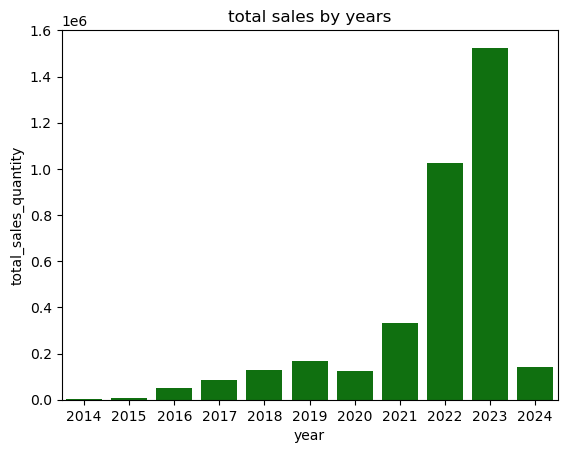

In [4]:
query = """ select year,sum(ev_sales_quantity) as total_sales
from electric_vehicles 
group by year
"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data, columns=["year","total_sales_quantity"])

print(df)

sns.barplot(data=df , x="year",y="total_sales_quantity",color="green")
plt.title("total sales by years")
plt.show()

# Total sales trend over months

   month name total sales quantity
0         jan               360703
1         feb               228739
2         mar               299888
3         apr               232194
4         may               262747
5         jun               229754
6         jul               270473
7         aug               294022
8         sep               313433
9         oct               355083
10        nov               382217
11        dec               364558


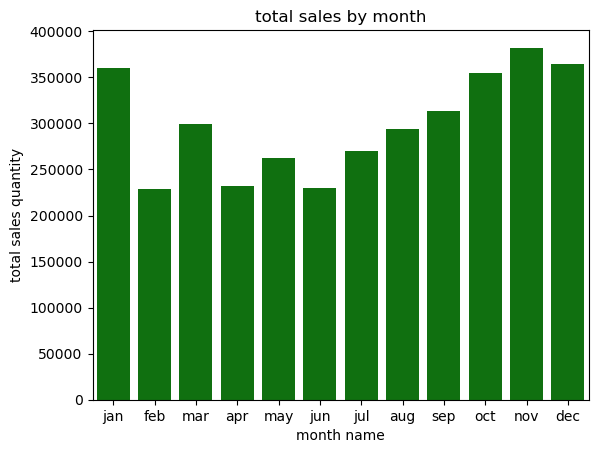

In [5]:
query=""" select month_name , sum(ev_sales_quantity) from electric_vehicles
group by month_name"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["month name","total sales quantity"])
print(df)

sns.barplot(data=df, x="month name",y="total sales quantity",color="green")
plt.title("total sales by month")
plt.show()





# Total sales trends over days

  month name total sales quantity
0     Sunday               440218
1     Monday               552001
2    Tuesday               488302
3  Wednesday               640916
4   Thursday               416581
5     Friday               568738
6   Saturday               487055


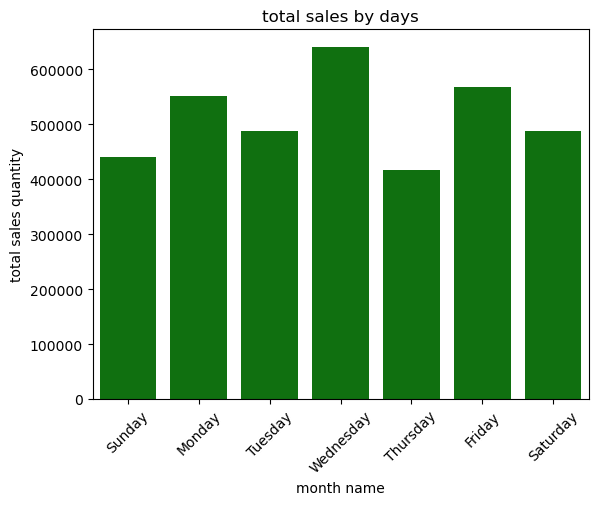

In [6]:
query=""" select day_of_week , sum(ev_sales_quantity) from electric_vehicles
group by day_of_week
order by field(day_of_week,"sunday","monday","tuesday","wednesday","thursday","friday","saturday")"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["month name","total sales quantity"])
print(df)

sns.barplot(data=df, x="month name",y="total sales quantity",color="green")
plt.title("total sales by days")
plt.xticks(rotation=45)
plt.show()


# States with highest EV sales

In [31]:
query=""" select state,sum(ev_sales_quantity) total_sales_quantity
from electric_vehicles
group by state
order by total_sales_quantity desc
limit 5"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["state","total sales quantity"])

print(df)

           state total sales quantity
0  Uttar Pradesh               732074
1    Maharashtra               401535
2      Karnataka               315498
3          Delhi               268538
4      Rajasthan               228573


# States with lowest EV sales

In [32]:
query=""" select state,sum(ev_sales_quantity) total_sales_quantity
from electric_vehicles
group by state
order by total_sales_quantity asc
limit 5"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["state","total sales quantity"])

print(df)

                      state total sales quantity
0                    Sikkim                    4
1         Arunachal Pradesh                   40
2                  Nagaland                   52
3                    Ladakh                   88
4  Andaman & Nicobar Island                  202


# Sales by each type

In [34]:
query=""" select vehicle_type, sum(ev_sales_quantity) summ
from electric_vehicles
group by vehicle_type
order by summ desc """

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["vehicle type","sales quantity"])
print(df)

          vehicle type sales quantity
0          2W_Personal        1796340
1   3W_Shared_LowSpeed        1408127
2          4W_Personal         130676
3    3W_Goods_LowSpeed          90656
4            3W_Shared          76132
5             3W_Goods          44974
6            4W_Shared          19099
7            2W_Shared          11765
8               Others           8612
9                  Bus           7009
10         3W_Personal            421
11     Institution Bus              0


# Vehicle class with higher sales

In [41]:
query=""" select vehicle_class , sum(ev_sales_quantity) summ
from electric_vehicles
group by vehicle_class 
order by summ desc
limit 10"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["vehicle class","sales quantity"])
print(df)

                       vehicle class sales quantity
0                    M-CYCLE/SCOOTER        1697373
1                      E-RICKSHAW(P)        1408127
2                          MOTOR CAR         130676
3           E-RICKSHAW WITH CART (G)          90656
4          THREE WHEELER (PASSENGER)          76132
5                              MOPED          61253
6              THREE WHEELER (GOODS)          44974
7        MOTORISED CYCLE (CC > 25CC)          36390
8                          MOTOR CAB          18681
9  MOTOR CYCLE/SCOOTER-USED FOR HIRE          11765


# Total sales trends over the quarters

  quarters sales quantity
0       Q1         889330
1       Q2         724695
2       Q3         877928
3       Q4        1101858


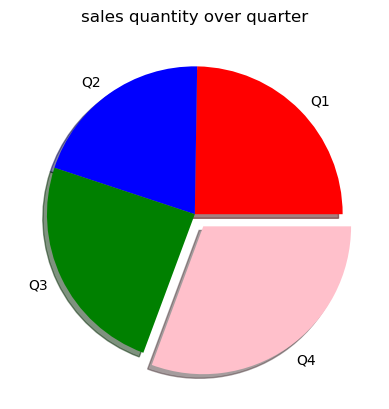

In [30]:
query=""" select quarters , sum(ev_sales_quantity) summ
from electric_vehicles
group by quarters
"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["quarters","sales quantity"])
print(df)
c=["red","blue","green","pink"]
ex=[0,0,0,0.1]
plt.pie(x=df["sales quantity"],labels=df["quarters"],colors=c,shadow=True,explode=ex)
plt.title("sales quantity over quarter")
plt.show()

# Total sales trend over day type (weekdays/weekends)

In [45]:
query="""select case when day_of_week in("saturday","sunday") then "weekend"
       else "weekdays" 
        end as days , sum(ev_sales_quantity) summ
        from electric_vehicles
        group by days"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["day_type","sales quantity"])
print(df)

   day_type sales quantity
0  weekdays        2666538
1   weekend         927273


# States and their best years in terms of growth

In [53]:
query="""with cte as 
        (select state,`year`,sum(ev_sales_quantity) , 
        lag(sum(ev_sales_quantity)) over( partition by state order by `year`) previous_year_sales, 
        (sum(ev_sales_quantity)-lag(sum(ev_sales_quantity)) over( partition by state order by `year`)) growth
        from electric_vehicles
        group by state,`year`
        order by state,growth desc),
        
        cte2 as(
        select state , `year`, growth,dense_rank() over(partition by state order by growth desc) rnk
        from cte)
        
        select state,`year`,growth 
        from cte2
        where rnk=1"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["state","year","growth"])
print(df)

                       state  year  growth
0   Andaman & Nicobar Island  2021      56
1             Andhra Pradesh  2022   19466
2          Arunachal Pradesh  2023      19
3                      Assam  2022   25087
4                      Bihar  2022   32670
5                 Chandigarh  2023    3614
6               Chhattisgarh  2022   18149
7                      Delhi  2022   36450
8                 DNH and DD  2022     111
9                        Goa  2022    4591
10                   Gujarat  2022   59222
11                   Haryana  2022   17198
12          Himachal Pradesh  2022     681
13         Jammu and Kashmir  2023    5030
14                 Jharkhand  2022    9940
15                 Karnataka  2022   62620
16                    Kerala  2023   35043
17                    Ladakh  2022      34
18            Madhya Pradesh  2023   30254
19               Maharashtra  2022  106129
20                   Manipur  2022     227
21                 Meghalaya  2023      71
22         

# States and their best month in terms of sales

In [3]:
query=""" with cte as(
      select state , month_name , sum(ev_sales_quantity) summ, dense_rank() over(partition by state order by sum(ev_sales_quantity) desc)rnk
      from electric_vehicles
      group by state,month_name)
      
      select state,month_name
      from cte 
      where rnk=1"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["state","month"])
print(df)

                       state month
0   Andaman & Nicobar Island   dec
1             Andhra Pradesh   mar
2          Arunachal Pradesh   jan
3                      Assam   sep
4                      Bihar   dec
5                 Chandigarh   nov
6               Chhattisgarh   nov
7                      Delhi   dec
8                 DNH and DD   jan
9                        Goa   nov
10                   Gujarat   oct
11                   Haryana   dec
12          Himachal Pradesh   nov
13         Jammu and Kashmir   oct
14                 Jharkhand   nov
15                 Karnataka   jan
16                    Kerala   jan
17                    Ladakh   jan
18            Madhya Pradesh   nov
19               Maharashtra   nov
20                   Manipur   feb
21                 Meghalaya   jan
22                   Mizoram   nov
23                  Nagaland   mar
24                    Odisha   oct
25                Puducherry   jan
26                    Punjab   nov
27                 R

# Sales and their worst month of sales

In [4]:
query=""" with cte as(
      select state , month_name , sum(ev_sales_quantity) summ, dense_rank() over(partition by state order by sum(ev_sales_quantity) )rnk
      from electric_vehicles
      group by state,month_name)
      
      select state,month_name
      from cte 
      where rnk=1;"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["state","month"])
print(df)

                       state month
0   Andaman & Nicobar Island   sep
1   Andaman & Nicobar Island   may
2             Andhra Pradesh   jun
3          Arunachal Pradesh   jun
4                      Assam   apr
5                      Bihar   apr
6                 Chandigarh   feb
7                 Chandigarh   apr
8               Chhattisgarh   feb
9                      Delhi   apr
10                DNH and DD   jun
11                       Goa   jun
12                   Gujarat   feb
13                   Haryana   feb
14          Himachal Pradesh   oct
15         Jammu and Kashmir   feb
16                 Jharkhand   may
17                 Karnataka   jun
18                    Kerala   jul
19                    Ladakh   feb
20                    Ladakh   mar
21                    Ladakh   apr
22            Madhya Pradesh   apr
23               Maharashtra   jun
24                   Manipur   sep
25                 Meghalaya   dec
26                   Mizoram   jun
27                  

# Seasonal sales pattern

  seasons total sales quantity
0  winter              1107478
1  spring               760821
2  summer               762974
3  autumn               962538


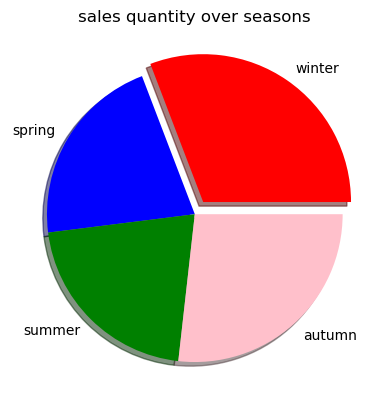

In [33]:
query=""" select case when month_name in("dec","jan","nov") then "winter"
           when month_name in("mar","apr","feb") then "spring"
           when month_name in("jun","jul","may") then "summer"
            else "autumn" end as seasons , 
		sum(ev_sales_quantity) total_sales_quantity
        from electric_vehicles
        group by seasons
"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["seasons","total sales quantity"])
print(df)

c=["red","blue","green","pink"]
ex=[0.1,0,0,0]
plt.pie(x=df["total sales quantity"],labels=df["seasons"],colors=c,shadow=True,explode=ex)
plt.title("sales quantity over seasons")
plt.show()

# Percentage of total sales from each state

In [12]:
query=""" select state, (sum(ev_sales_quantity)*100/(select sum(ev_sales_quantity) from electric_vehicles)) perc
        from electric_vehicles
        group by state
        order by perc desc
"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["state","percentage sales "])
print(df)

                       state percentage sales 
0              Uttar Pradesh           20.3704
1                Maharashtra           11.1730
2                  Karnataka            8.7789
3                      Delhi            7.4722
4                  Rajasthan            6.3602
5                      Bihar            5.9398
6                 Tamil Nadu            5.7572
7                    Gujarat            4.9171
8                      Assam            4.2272
9                     Kerala            3.7077
10            Madhya Pradesh            3.7059
11                    Odisha            2.4159
12                   Haryana            2.3721
13               West Bengal            2.1735
14            Andhra Pradesh            2.1525
15              Chhattisgarh            2.0946
16               Uttarakhand            1.6029
17                    Punjab            1.3714
18                 Jharkhand            1.3320
19                   Tripura            0.5105
20           

# sales trend over dates

           date total sales quantity
0    2014-01-01                  232
1    2014-02-01                  171
2    2014-03-01                  220
3    2014-04-01                  252
4    2014-05-01                  186
..          ...                  ...
116  2023-09-01               127793
117  2023-10-01               139232
118  2023-11-01               152610
119  2023-12-01               141033
120  2024-01-01               143182

[121 rows x 2 columns]


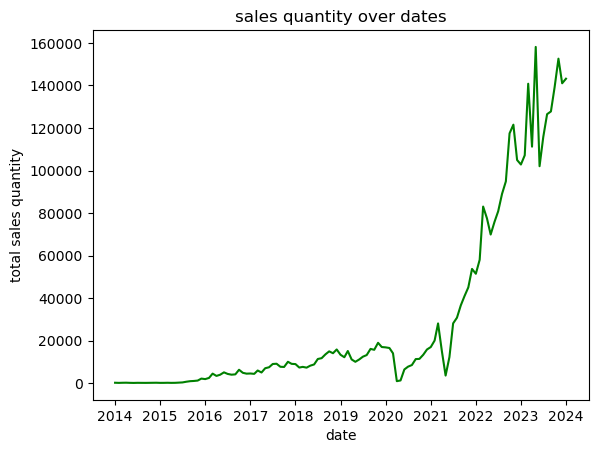

In [7]:
query=""" SELECT  `date`, sum(ev_sales_quantity) FROM ev_sales.electric_vehicles
group by `date`
order by `date`
"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["date","total sales quantity"])
print(df)

sns.lineplot(data=df,x="date",y="total sales quantity",color="green")
plt.title("sales quantity over dates")
plt.show()